In [1]:
import cenpy
import contextily as ctx 
import segregation
%matplotlib inline
import matplotlib as mpl

In [2]:
import xyzservices.providers as xyz
import matplotlib.pyplot as plt #to make sure there are no errors when plotting a graph
from contextily import add_basemap
import folium 

In [3]:
import geopandas as gpd 
from census import Census 
from us import states
from shapely.geometry import Polygon

In [4]:
import pandas as pd
import openpyxl

CPS Historical Migration/Geographic Mobility Tables

In [5]:
Texas =pd.read_excel('../county-to-county-2015-2019-ins-outs-nets-gross.xlsx', sheet_name='Texas')

In [6]:
Texas_df = pd.DataFrame(Texas)

In [7]:
Texas_df.head(10)

,State Code of Geography A,FIPS County Code of Geography A,State/U.S. Island Area/Foreign Region Code of Geography B,FIPS County Code of Geography B',State Name of Geography A,County Name of Geography A,State/U.S. Island Area/Foreign Region of Geography B,County Name of Geography B,Flow from Geography B to Geography A Estimate,Flow from Geography B to Geography A MOE,Counterflow from Geography A to Geography B1 Estimate,Counterflow from Geography A to Geography B1 MOE,Net Migration from Geography B to Geography A1 MOE,Net Migration from Geography B to Geography A1 Estimate,Gross Migration between Geography A and Geography B1 Estimate',Gross Migration between Geography A and Geography B1 MOE,FIPS County Code of Geography A.1,FIPS County Code of Geography B'.1
0,048,1.0,001,89.0,Texas,Anderson County,Alabama,Madison County,13.0,19.0,0.0,28.0,13.0,19.0,13.0,19.0,29.0,NaN
1,048,1.0,002,16.0,Texas,Anderson County,Alaska,Aleutians West Census Area,0.0,32.0,12.0,12.0,-12.0,12.0,12.0,12.0,NaN,29.0
2,048,1.0,005,113.0,Texas,Anderson County,Arkansas,Polk County,0.0,32.0,3.0,5.0,-3.0,5.0,3.0,5.0,NaN,NaN
3,048,1.0,005,143.0,Texas,Anderson County,Arkansas,Washington County,11.0,17.0,0.0,28.0,11.0,17.0,11.0,17.0,NaN,NaN
4,048,1.0,006,45.0,Texas,Anderson County,California,Mendocino County,4.0,8.0,0.0,29.0,4.0,8.0,4.0,8.0,NaN,NaN
5,048,1.0,006,73.0,Texas,Anderson County,California,San Diego County,16.0,27.0,0.0,29.0,16.0,27.0,16.0,27.0,NaN,NaN
6,048,1.0,008,33.0,Texas,Anderson County,Colorado,Dolores County,0.0,32.0,5.0,7.0,-5.0,7.0,5.0,7.0,NaN,NaN
7,048,1.0,008,41.0,Texas,Anderson County,Colorado,El Paso County,0.0,32.0,15.0,24.0,-15.0,24.0,15.0,24.0,NaN,NaN
8,048,1.0,008,43.0,Texas,Anderson County,Colorado,Fremont County,9.0,17.0,0.0,25.0,9.0,17.0,9.0,17.0,NaN,NaN
9,048,1.0,012,67.0,Texas,Anderson County,Florida,Lafayette County,0.0,32.0,7.0,20.0,-7.0,20.0,7.0,20.0,NaN,NaN


In [8]:
Texas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31929 entries, 0 to 31928
Data columns (total 18 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   State Code of Geography A                                       31929 non-null  object 
 1   FIPS County Code of Geography A                                 31923 non-null  float64
 2   State/U.S. Island Area/Foreign Region Code of Geography B       31923 non-null  object 
 3   FIPS County Code of Geography B'                                31256 non-null  float64
 4   State Name of Geography A                                       31923 non-null  object 
 5   County Name of Geography A                                      31923 non-null  object 
 6   State/U.S. Island Area/Foreign Region of Geography B            31923 non-null  object 
 7   County Name of Geography B                       

Flow out of Bexar County

In [23]:
bexar_county_flow = pd.read_excel('../FlowOutBexar.xlsx')

In [25]:
bexar_county_flow.dtypes

State Code of Geography A                                           int64
FIPS County Code of Geography A                                     int64
State/U.S. Island Area/Foreign Region Code of Geography B          object
FIPS County Code of Geography B'                                  float64
State Name of Geography A                                          object
County Name of Geography A                                         object
State/U.S. Island Area/Foreign Region of Geography B               object
County Name of Geography B                                         object
Flow from Geography B to Geography A Estimate                       int64
Flow from Geography B to Geography A MOE                            int64
Counterflow from Geography A to Geography B1 Estimate             float64
Counterflow from Geography A to Geography B1 MOE                  float64
Net Migration from Geography B to Geography A1 MOE                float64
Net Migration from Geography B to Geog

In [10]:
bx_out = bexar_county_flow[['County Name of Geography A','County Name of Geography B', 'Counterflow from Geography A to Geography B1 Estimate']]
bx_out.head(25)

,County Name of Geography A,County Name of Geography B,Counterflow from Geography A to Geography B1 Estimate
0,Bexar County,Baldwin County,16.0
1,Bexar County,Calhoun County,47.0
2,Bexar County,Coffee County,47.0
3,Bexar County,Crenshaw County,0.0
4,Bexar County,Cullman County,42.0
5,Bexar County,Dale County,39.0
6,Bexar County,Houston County,25.0
7,Bexar County,Jefferson County,139.0
8,Bexar County,Lauderdale County,39.0
9,Bexar County,Lee County,42.0


<AxesSubplot:xlabel='County Name of Geography B'>

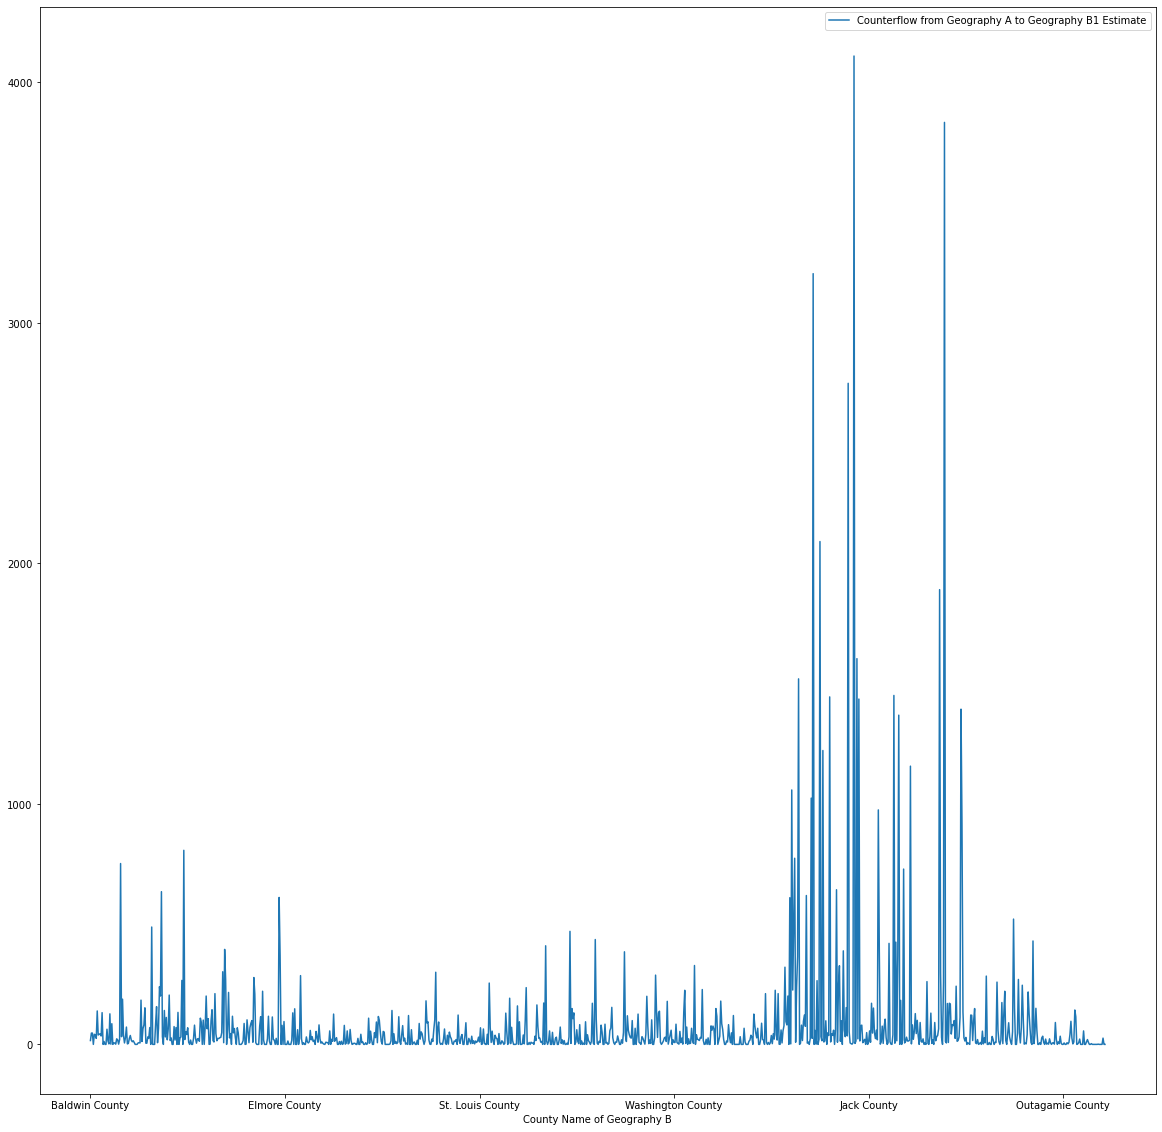

In [13]:
bx_out.plot(x="County Name of Geography B", y= 'Counterflow from Geography A to Geography B1 Estimate', figsize=(20,20))